In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

# For loading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


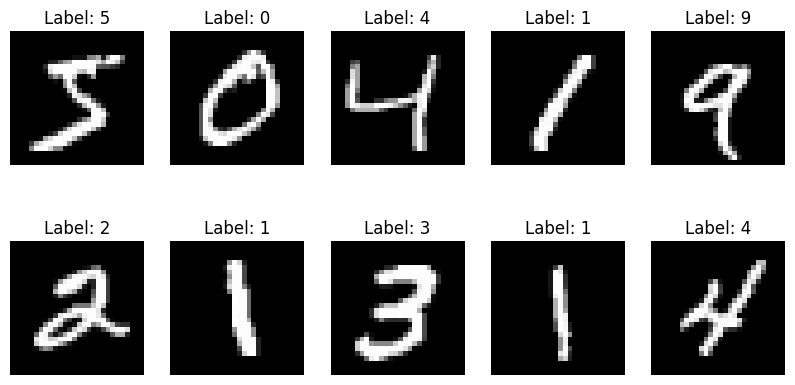

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [5]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [6]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (48000, 784)
Validation set shape: (12000, 784)


Accuracy of KNN classifier: 0.9696


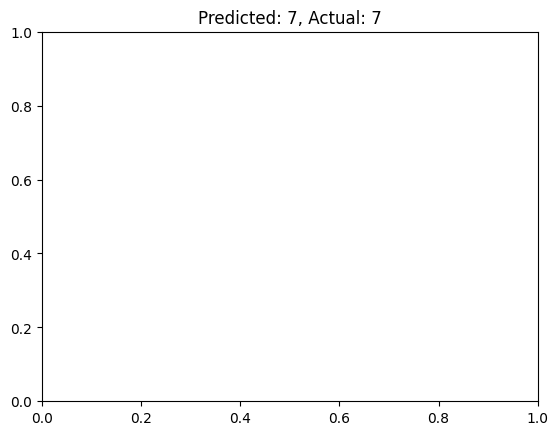

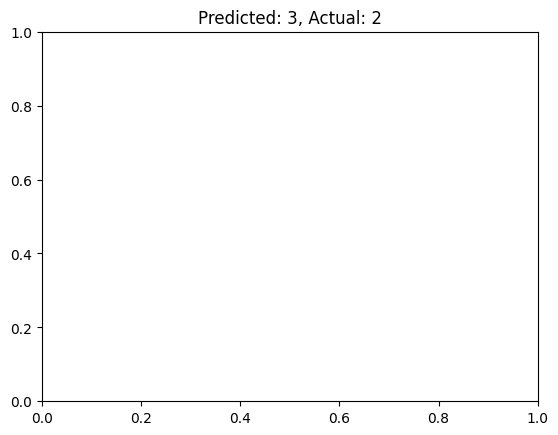

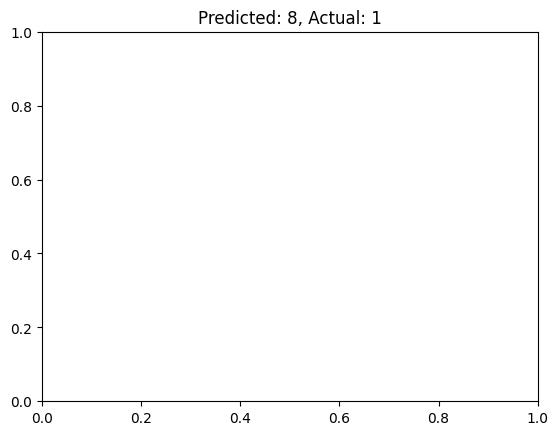

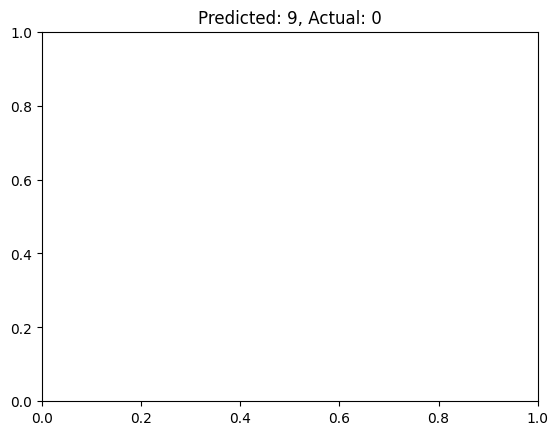

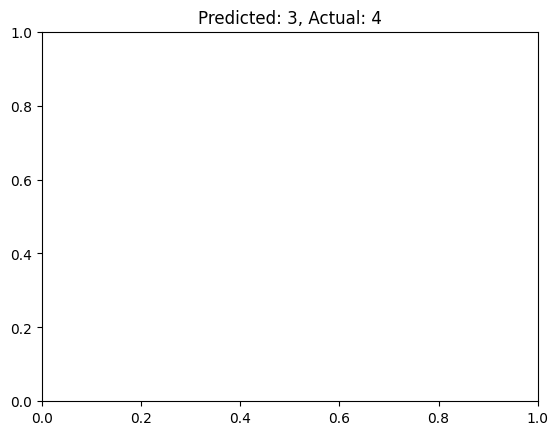

In [7]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_split,y_train_split)
y_val_pred_knn = knn_model.predict(X_val)
knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f"Accuracy of KNN classifier: {knn_acc:.4f}")

for i in range(5):
    plt.title(f"Predicted: {y_val_pred_knn[i]}, Actual: {y_test[i]}")
    plt.show()

Accuracy of Decision Tree classifier: 86.95%


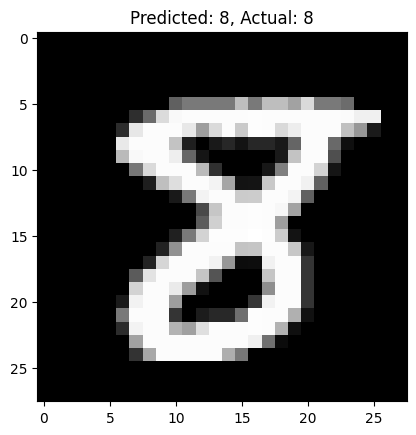

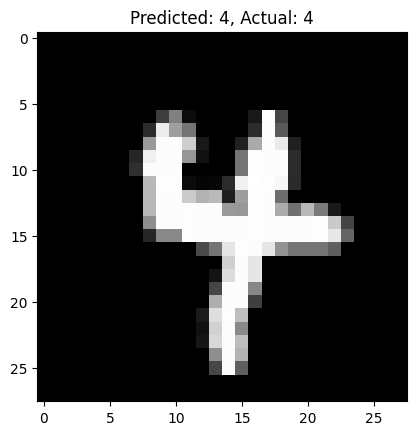

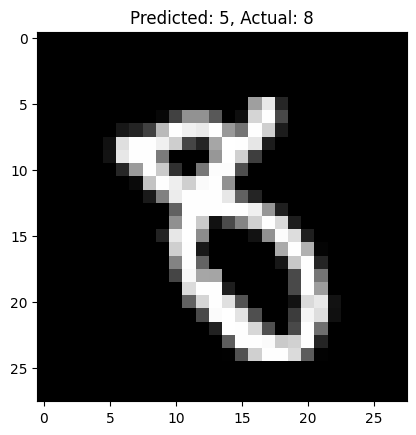

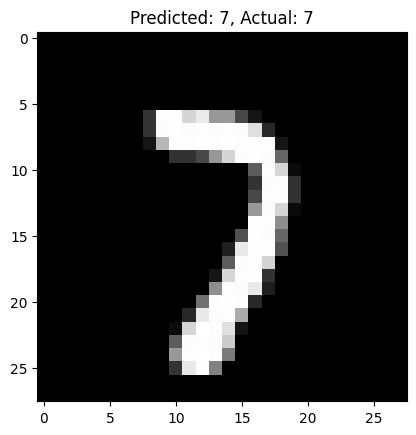

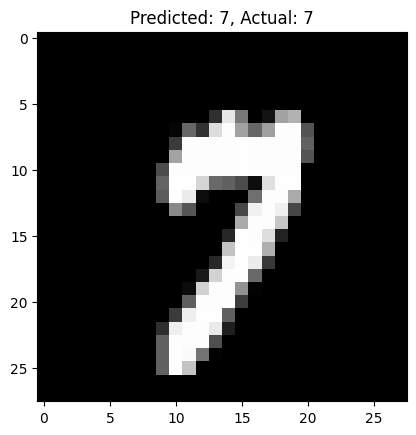

In [8]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load MNIST dataset
mnist = fetch_openml('mnist_784')

# Step 2: Extract the features and target labels
X = mnist.data.astype('float64')  # Features (28x28 pixel images flattened to 784 features)
y = mnist.target.astype('int')   # Target labels (digits 0-9)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Step 5: Train the Decision Tree model
dt_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Step 7: Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree classifier: {accuracy * 100:.2f}%")

# Optional: Visualize some test results
for i in range(5):
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")
    plt.show()


KNN Validation Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.96      1.00      0.98      1322
           2       0.98      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.97      1299
           8       0.99      0.94      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



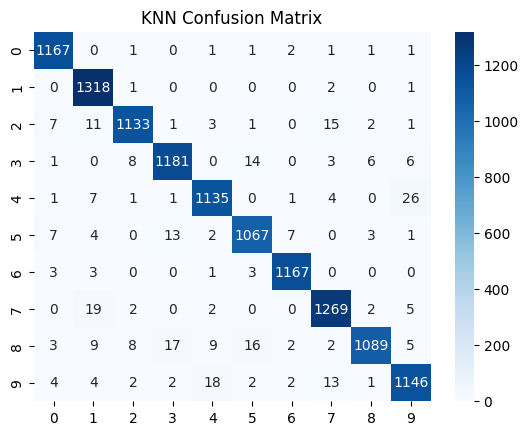

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9352
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.93      0.92      1174
           3       0.91      0.91      0.91      1219
           4       0.93      0.96      0.94      1176
           5       0.90      0.90      0.90      1104
           6       0.97      0.96      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.94      0.89      0.91      1160
           9       0.94      0.90      0.92      1194

    accuracy                           0.94     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.94      0.94      0.94     12000



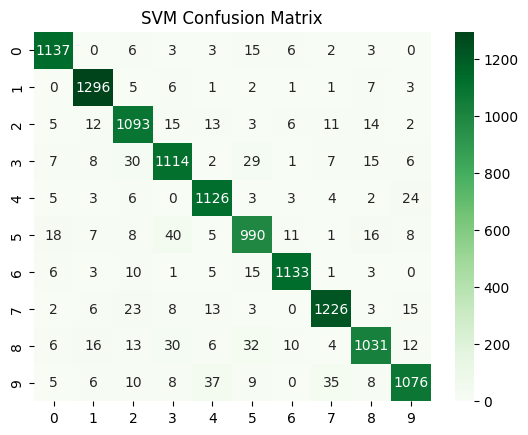

In [10]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Check the shape of X_test_flat and y_test
print(f"Shape of X_test_flat: {X_test_flat.shape}")
print(f"Length of y_test: {len(y_test)}")


# Predict using the trained SVM model
y_test_pred_svm = svm_model.predict(X_test_flat)

# Check the shape of predictions
print(f"Shape of y_test_pred_svm: {y_test_pred_svm.shape}")



Shape of X_test_flat: (10000, 784)
Length of y_test: 8400
Shape of y_test_pred_svm: (10000,)


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('test.csv.zip')
data = pd.read_csv('train.csv.zip')

# Separate features and target variable
X = data.iloc[:, 1:]  # Features: all columns except the first
y = data.iloc[:, 0]   # Target: first column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 85.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       816
           1       0.91      0.94      0.93       909
           2       0.82      0.81      0.81       846
           3       0.83      0.81      0.82       937
           4       0.85      0.85      0.85       839
           5       0.77      0.79      0.78       702
           6       0.87      0.89      0.88       785
           7       0.90      0.88      0.89       893
           8       0.79      0.78      0.78       835
           9       0.84      0.85      0.84       838

    accuracy                           0.85      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.85      0.85      8400


Confusion Matrix:
[[745   2  10   9   7  13   9   4  11   6]
 [  1 858  11   8   1   6   4   3  14   3]
 [  9  15 684  27  17  12  18  27  28   9]
 [  7  14  24 757  11  51   5  14  37  17]
 [  4   9